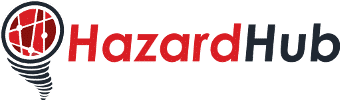

In [1]:
from math import radians, cos, sin, asin, sqrt

from ipywidgets import widgets, HBox, VBox
from IPython.display import HTML, Image

Image(filename='logo.png')

# Tools: Calculate the distance between two lat/lons 

Use this simple tool to quickly find the 'as-the-crow-flies' distance between two points

In [2]:
# Display 

lat1 = widgets.FloatText(description='Latitude 1:')
lon1 = widgets.FloatText(description='Longitude 1:')
lat2 = widgets.FloatText(description='Latitude 2:')
lon2 = widgets.FloatText(description='Longitude 2:')
first_label = widgets.Label(value='Enter the first lat/lon pair in decimal degrees:')
first = HBox([lat1, lon1]).add_class('bottom-spacing')
second_label = widgets.Label(value='Enter the second lat/lon pair in decimal degrees:')
second = HBox([lat2, lon2])
output_units = widgets.Dropdown(options=['Kilometers', 'Miles', 'Nautical Miles'], 
                                        value='Kilometers', layout={'width': 'max-content'})
output_units_box = widgets.Box(
    [widgets.Label(value='Preferred output units:'), output_units])
submit = widgets.Button(description="Calculate", button_style="primary", tooltip='Compute distance',
                        icon="calculator").add_class('center-align')
clear = widgets.Button(description="Clear Inputs", button_style="danger", tooltip='Clear inputs',
                        icon="undo").add_class('center-align')
third = HBox([submit, clear])

output = widgets.Output()

display(HTML("<style>" +
             ".bottom-spacing{margin-bottom:15px;}" +
             ".center-align{margin:auto; width:50%; margin-top: 15px; margin-right:15px;}" + 
             "div.input{display:none;}" +
             "</style>"))

# Calculation
def calc_distance(obj):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    output.clear_output()
    lon_rad1, lat_rad1, lon_rad2, lat_rad2 = map(radians, [lon1.value, lat1.value, lon2.value, lat2.value])
    dlon = float(lon_rad2) - float(lon_rad1) 
    dlat = lat_rad2 - lat_rad1 
    a = sin(dlat/2)**2 + cos(lat_rad1) * cos(lat_rad2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    if output_units.value == 'Kilometers':
        r = 6371.137 # This is WGS-84 value
        units = 'kilometers'
    elif output_units.value == 'Nautical Miles':
        r = 3440.1
        units = 'nautical miles'
    else:
        r = 3959.87433
        units = 'square miles'
    with output:
        print("The distance between these two points is {} {}.".format(round(c * r, 6), units))
        
def clear_all(obj):
    lat1.value, lat2.value, lon1.value, lon2.value = 0, 0, 0, 0 
    output.clear_output()
    
    
submit.on_click(calc_distance)
clear.on_click(clear_all)

VBox([first_label, first, second_label, second, output_units_box, third, output])
